In [3]:
import numpy as np
import matplotlib.pyplot as plt

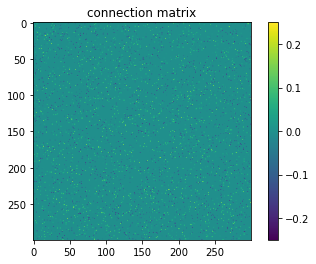

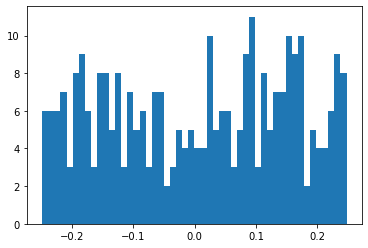

In [240]:
no_neurons = 300
sparsity = 0.95
M = (np.random.random((no_neurons,no_neurons))>sparsity).astype(np.float64)
M *= (np.random.random((no_neurons,no_neurons))-0.5)*0.5
biases = (np.random.random(no_neurons)-0.5)*0.5

plt.imshow(M)
plt.colorbar()
plt.title('connection matrix')
plt.show()

plt.hist(biases,bins=50)
plt.show()

In [241]:
no_epochs = 800

activity = np.zeros((no_epochs,no_neurons))
activity[0] = np.random.random(no_neurons)

cell_in = np.zeros((no_epochs,no_neurons))

for i in range(1,no_epochs):
    activity[i] = ((M@activity[i-1]-biases+activity[i-1]*0.54)>0.).astype(np.float64)
    cell_in[i] = M@activity[i-1]-biases



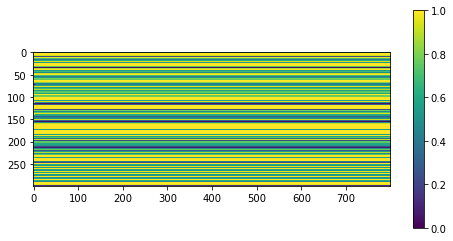

In [242]:
fig = plt.figure(figsize=(8,4))
plt.imshow(activity.T)
plt.colorbar()
plt.show()